In [2]:
import pandas as pd

orders = pd.read_csv('pizza_sales/orders.csv')
order_details = pd.read_csv('pizza_sales/order_details.csv')
pizzas = pd.read_csv('pizza_sales/pizzas.csv')
pizza_types = pd.read_csv('pizza_sales/pizza_types.csv', encoding='latin1')


In [3]:
merged = pd.merge(order_details, orders, on='order_id')         
merged = pd.merge(merged, pizzas, on='pizza_id')                
merged = pd.merge(merged, pizza_types, on='pizza_type_id')      

In [5]:
merged.to_csv('pizza_sales.csv', index=False)

print(merged.head())

   order_details_id  order_id       pizza_id  quantity        date      time  \
0                 1         1     hawaiian_m         1  2015-01-01  11:38:36   
1                 2         2  classic_dlx_m         1  2015-01-01  11:57:40   
2                 3         2  five_cheese_l         1  2015-01-01  11:57:40   
3                 4         2    ital_supr_l         1  2015-01-01  11:57:40   
4                 5         2     mexicana_m         1  2015-01-01  11:57:40   

  pizza_type_id size  price                       name category  \
0      hawaiian    M  13.25         The Hawaiian Pizza  Classic   
1   classic_dlx    M  16.00   The Classic Deluxe Pizza  Classic   
2   five_cheese    L  18.50      The Five Cheese Pizza   Veggie   
3     ital_supr    L  20.75  The Italian Supreme Pizza  Supreme   
4      mexicana    M  16.00         The Mexicana Pizza   Veggie   

                                         ingredients  
0           Sliced Ham, Pineapple, Mozzarella Cheese  
1  Pep

1. 

In [7]:
# Creating a column for the total price per order line
merged['total_price'] = merged['quantity'] * merged['price']

# Calculate total revenue
total_revenue = merged['total_price'].sum()

# print
print(f"Total revenue for the year: ${total_revenue:,.2f}")


Total revenue for the year: $817,860.05


In [ ]:
## 

In [9]:
total_quantity = merged['quantity'].sum()
print(f"Total quantity of pizzas sold: {total_quantity:,}")


Total quantity of pizzas sold: 49,574


3. 

In [10]:
total_orders = merged['order_id'].nunique()
print(f"Total number of orders: {total_orders:,}")


Total number of orders: 21,350


4. 

In [11]:
pizza_types_count = merged['pizza_type_id'].nunique()
print(f"Total number of distinct pizza types: {pizza_types_count}")


Total number of distinct pizza types: 32


5.

In [12]:
average_price = merged['price'].mean()
print(f"Average pizza price: ${average_price:.2f}")


Average pizza price: $16.49


In [13]:
import matplotlib.pyplot as plt

# Ensure 'time' is in datetime format
merged['time'] = pd.to_datetime(merged['time'])

# Extract the hour
merged['hour'] = merged['time'].dt.hour

# Group by hour and sum total sales
sales_by_hour = merged.groupby('hour')['total_price'].sum().sort_values(ascending=False)

# Print top 5 peak hours
print("Top 5 peak sales hours:")
print(sales_by_hour.head())




C:\Users\user\AppData\Local\Temp\ipykernel_6856\3037695966.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged['time'] = pd.to_datetime(merged['time'])


Top 5 peak sales hours:
hour
12    111877.90
13    106065.70
18     89296.85
17     86237.45
19     72628.90
Name: total_price, dtype: float64


7.

In [16]:

# Ensure 'date' is in datetime format
merged['date'] = pd.to_datetime(merged['date'])

# Extract day of the week (e.g., Monday, Tuesday)
merged['day_of_week'] = merged['date'].dt.day_name()

# Group by day of the week and sum sales
sales_by_day = merged.groupby('day_of_week')['total_price'].sum().sort_values(ascending=False)

# Print results
print("Total sales by day of the week:")
print(sales_by_day)


Total sales by day of the week:
day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: total_price, dtype: float64


8.

In [19]:
# Group by pizza name and sum the quantity sold
top_pizzas = merged.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)

# Display the result
print("Top 5 best-selling pizzas:")
print(top_pizzas)


Top 5 best-selling pizzas:
name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


9.

In [21]:
# Convert date column to datetime
merged['date'] = pd.to_datetime(merged['date'])

# Create a new column for 'month' as "YYYY-MM"
merged['month'] = merged['date'].dt.to_period('M').astype(str)

# Group by month and calculate total sales
monthly_sales = merged.groupby('month')['total_price'].sum().sort_index()


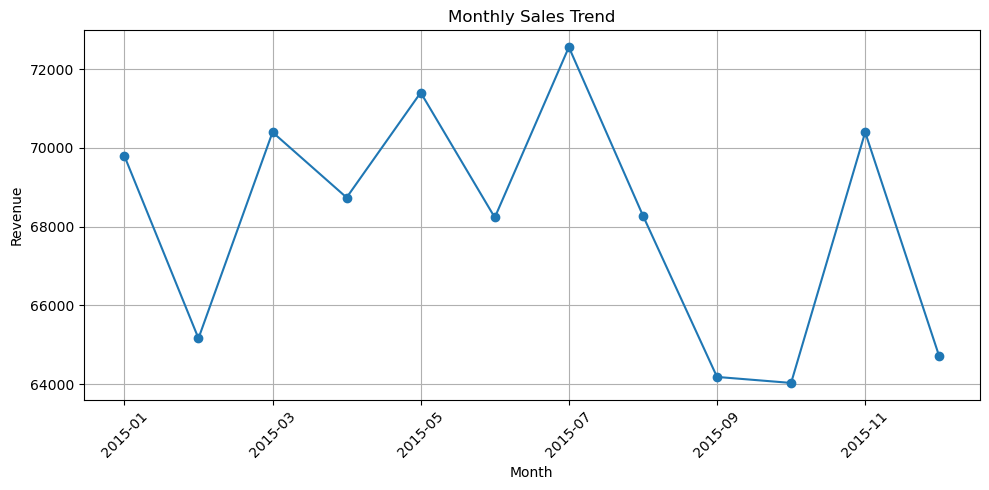

In [22]:
import matplotlib.pyplot as plt

monthly_sales.plot(kind='line', marker='o', figsize=(10,5), title='Monthly Sales Trend', xlabel='Month', ylabel='Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


10.

In [23]:
# Group by pizza name and sum quantity sold
low_selling = merged.groupby('name')['quantity'].sum().sort_values().head(5)

# Display the result
print("Bottom 5 least-selling pizzas:")
print(low_selling)


Bottom 5 least-selling pizzas:
name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64
